📊 Desafio 59 — Variação de Gastos com Educação por Estado

Este dataset apresenta dados fictícios de diferentes estados brasileiros, com informações sobre os gastos anuais com educação entre 2015 e 2022, população e IDH.

🔍 Tarefas:

Tratamento de Dados:
- Existem valores ausentes nos dados? Como você trataria esses valores para manter a integridade da análise?

Análise Exploratória:
- Qual estado teve o maior crescimento percentual no gasto com educação entre 2015 e 2022?

Visualização:
- Crie um gráfico de linha com a evolução média dos gastos com educação ao longo dos anos para todos os estados.

Machine Learning (Simples):
- Treine um modelo de regressão (como LinearRegression) para prever o gasto com educação de um estado com base na população e IDH. Avalie o desempenho com r2_score.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score

In [3]:
df = pd.read_csv("dia_59_gastos_educacao.csv")
df.head()

,Estado,Ano,GastoEducacao,Populacao,IDH
0,SP,2015,2498.16,42831429,0.796
1,SP,2016,2431.72,42831429,0.796
2,SP,2017,2367.02,42831429,0.796
3,SP,2018,2201.33,42831429,0.796
4,SP,2019,3397.79,42831429,0.796


In [14]:
#Existem valores ausentes nos dados? Como você trataria esses valores para manter a integridade da análise?
print(df.isna().sum())
df.fillna(df.groupby("Estado").transform("mean"), inplace=True)

Estado           0
Ano              0
GastoEducacao    0
Populacao        0
IDH              0
dtype: int64


In [28]:
#Qual estado teve o maior crescimento percentual no gasto com educação entre 2015 e 2022?
df_percentual = df.pivot(index="Estado", columns="Ano", values="GastoEducacao")
df_percentual["Crescimento"] = ((df_percentual[2022] - df_percentual[2015]) / df_percentual[2015]).round(2) * 100

print(df_percentual["Crescimento"].idxmax(), df_percentual["Crescimento"].max())

BA 79.0


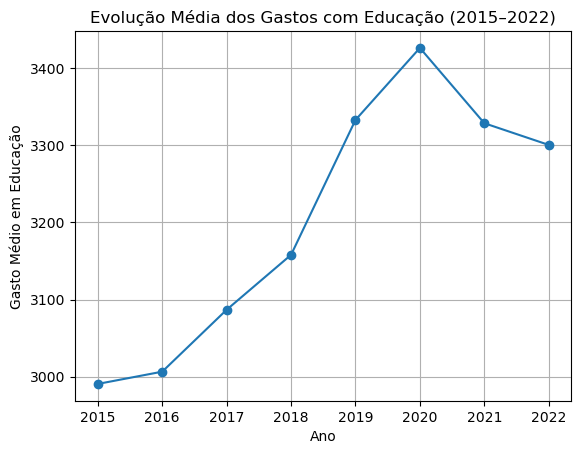

In [41]:
#Crie um gráfico de linha com a evolução média dos gastos com educação ao longo dos anos para todos os estados.
educacao_media_gastos_anos = df.groupby("Ano")["GastoEducacao"].mean()

plt.plot(educacao_media_gastos_anos, marker="o")
plt.title("Evolução Média dos Gastos com Educação (2015–2022)")
plt.xlabel("Ano")
plt.ylabel("Gasto Médio em Educação")
plt.grid()
plt.show()

In [46]:
#Treine um modelo de regressão (como LinearRegression) para prever o gasto com educação de um estado com base na população e IDH. Avalie o desempenho com r2_score.
X = df[["Populacao", "IDH"]]
y = df["GastoEducacao"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(r2)
print(df[["Populacao", "IDH", "GastoEducacao"]].corr())

-0.21474611208442584
               Populacao       IDH  GastoEducacao
Populacao       1.000000  0.234241       0.224384
IDH             0.234241  1.000000       0.006921
GastoEducacao   0.224384  0.006921       1.000000
